In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
df=pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
df.shape

(5572, 2)

In [64]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:>

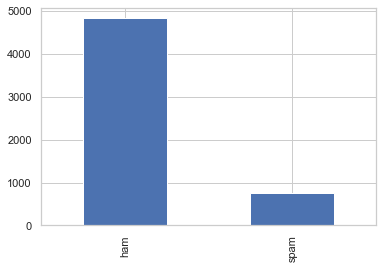

In [65]:
df['label'].value_counts().plot(kind='bar')

In [66]:
df['message']=df['message'].str.replace("[^a-zA-Z]"," ")#removes punctuations
df.head()

<ipython-input-66-1d5e6eaa02bf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message']=df['message'].str.replace("[^a-zA-Z]"," ")#removes punctuations


,label,message
0,ham,Go until jurong point crazy Available only ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I don t think he goes to usf he lives aro...


In [67]:
df['message']=df['message'].apply(lambda x:" ".join([w for w in x.split() if len(w)>2]))#removes words which has lessthan 3 letters
df.head()

,label,message
0,ham,until jurong point crazy Available only bugis ...
1,ham,lar Joking wif oni
2,spam,Free entry wkly comp win Cup final tkts May Te...
3,ham,dun say early hor already then say
4,ham,Nah don think goes usf lives around here though


In [68]:
df['message']=df['message'].apply(lambda x: x.lower())#makes all characters into lower case
df.head()

,label,message
0,ham,until jurong point crazy available only bugis ...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts may te...
3,ham,dun say early hor already then say
4,ham,nah don think goes usf lives around here though


In [69]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jtobss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jtobss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
df['message']=df['message'].apply(lambda x:" ".join([i for i in x.split() if i not in stopwords.words('english')]))#removes stopwords
df.head()

,label,message
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts may te...
3,ham,dun say early hor already say
4,ham,nah think goes usf lives around though


In [71]:
#Lemmatization
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
#pos_tag-->wordnet_tag-->lemmatizer-->root_word

def lemmatise(sentence):
    nltk_tagged=nltk.pos_tag(word_tokenize(sentence))
    wordnet_tag=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
    lemmatized_sentence=[]
    for word,tag in wordnet_tag:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatized_sentence)
    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jtobss\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
df['message']=df['message'].apply(lambda x:lemmatise(x))
df.head()

,label,message
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts may te...
3,ham,dun say early hor already say
4,ham,nah think go usf life around though


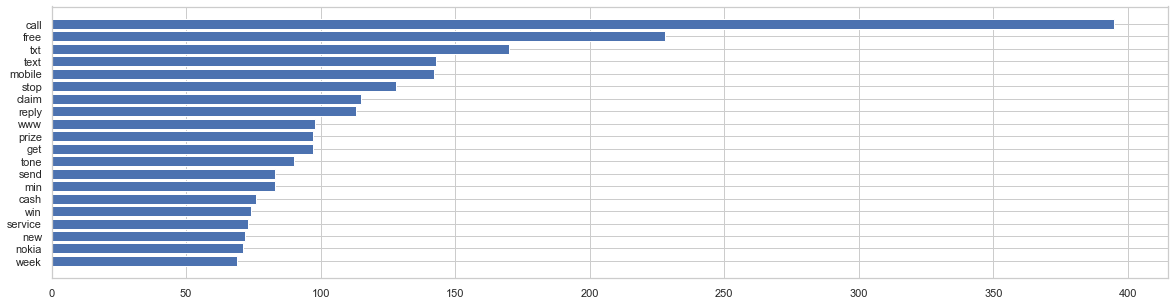

In [73]:
## Plotting most frequent words from 'spam' using bar chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
from nltk import FreqDist

# Subset spam dataset
all_words_df = df.loc[df['label'] == 'spam',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['message']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=2500)#limiting max_features_to_2500
X=tfidf.fit_transform(df.message).toarray()
Y=df.label.map({'spam':1,'ham':0}).values
featureNames=tfidf.get_feature_names()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [75]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((4457, 2500), (1115, 2500), (4457,), (1115,))

In [76]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, Y_train)

y_pred=spam_detect_model.predict(X_test)

In [77]:
accuracy = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[953   2]
 [ 22 138]]
The model accuracy is 0.97847533632287


In [78]:
from sklearn.metrics import roc_auc_score
print('The auroc_score is',roc_auc_score(Y_test, spam_detect_model.predict_proba(X_test)[:, 1]))

The auroc_score is 0.9917801047120418
